<table>
<tr>    
<td style="text-align: center">
<h1>Dane sekwencyjne, przestrzenie osadzenia i kodowanie, przetwarzanie tekstów w języku naturalnym</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index-eng.php">Adrian Horzyk</a></h2>
<h3>Zapraszam do interaktywnej nauki, gdzie możesz sprawdzić i poeksperymentować z tym, czego się nauczyłeś/aś.</h3>
</td> 
</tr>
</table>

# Dane Sekwencyjne

__Dane sekwencyjne__ to drugi typ najczęściej używanych danych w rzeczywistych aplikacjach, ponieważ wiele procesów, sygnałów i danych wejściowych jest uporządkowanych w czasie lub z innych powodów, dlatego musimy wykorzystać tę szczególną relację między danymi prostymi lub przedmiotowymi, która ustawia je w porządku. __Kolejność__ ta ma szczególne znaczenie przy klasyfikowaniu, przewidywaniu, translacji, przekształcaniu lub wykonywaniu jakichkolwiek innych operacji na danych sekwencyjnych.

__Dane sekwencyjne__ są wykorzystywane w rozpoznawaniu mowy, generowaniu muzyki, automatycznej korekcie tekstu, klasyfikacji nastrojów, analizie sekwencji DNA, klasyfikacji sygnałów EKG i EEG, tłumaczeniu maszynowym, rozpoznawaniu aktywności wideo i wielu innych.

![examples of sequential data](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/SequentialDataExamples.png)

# Kodowanie słów z gorącą jedynką "one-hot"

__Słowa w zdaniach__ są typowym przykładem sekwencji obiektów. Jednym z popularnych sposobów reprezentacji słowa jest __one-hot encoding__ (kodowanie z gorącą jedynką), które zakłada reprezentację każdego słowa przez zwykle dosyć długi wektor, którego rozmiar zależy od liczby słów, które chcemy kodować i rozpoznać, np. 10 000 lub 50 000. Każdy taki wektor słów składa się z takiej liczby pól, ile słów reprezentujemy, a słowa te są zwykle uporządkowane leksykograficznie (alfabetycznie) lub według częstotliwości występowania w języku (po wybranym słowniku częstotliwości słów, aby ograniczyć słowa do najczęściej używanych). Każde reprezentowane słowo ma swoją dokładną pozycję w tym wektorze, reprezentowaną przez "gorącą" jedynkę (__one-hot__), podczas gdy na wszystkich pozostałych pozycjach wektora występuje wartość zero. Każde słowo jest więc reprezentowane przez wektor zawierający prawie wszędzie zera (0) z dokładnością do jednej pozycji reprezentującej to słowo, gdzie jest jedynka (1):

![one-hot vectors for word-frequency dictionary](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/One-hot_vectors_for_sorted_word-frequency_dictionary.png)

One-hot encoding is the most common, most basic way to turn a token (word) into a vector. You already saw it in action in our initial IMDB and Reuters examples. It consists of associating a unique integer index to every word, then turning this integer index _i_ into a binary vector of size _N_, which is the size of the used vocabulary. This vector would be all-zeros except for the i-th entry (position, field), which would be 1.

Of course, one-hot encoding can be done at the character level as well. To unambiguously drive home what one-hot encoding is and how to implement it, here are two toy examples of one-hot encoding: one for words and the other for characters:

Kodowanie z gorącą jedynką (__one-hot__) jest częstym i podstawowym sposobem przekształcenia tokena (słowa) w wektor, lecz przechowywanie ogromnych wektorów składających się z prawie samych zer nie byłoby efektywne, więc słowa kodujemy przy pomocy indeksów ich występowania w tych wektorach. Przypisujemy więc każdemu słowu unikalny indeks w postaci liczby całkowitej, a następnie przekształcamy ten indeks _i_ w wektor binarny o rozmiarze _N_, gdzie _N_ odpowiada rozmiarowi używanego słownictwa.

Oczywiście kodowanie "na gorąco" można również wykonać na poziomie znakowym (zamiast słów). Aby lepiej wyjaśnić, czym jest kodowanie one-hot i jak je wdrożyć, oto dwa proste przykłady kodowania __one-hot__: jeden dla słów, a drugi dla znaków:

In [1]:
#Install necessary libraries if necessary
# !python -m pip install tensorflow==2.10
# !python -m pip install keras==2.10
# !python -m pip install matplotlib
# !python -m pip install numpy
# !python -m pip install seaborn
# !python -m pip install pandas
# !python -m pip install cv2
# !python -m pip install scikit-learn
#!python -m pip install scikitplot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.8.1
Keras version: 2.8.0


In [2]:
# Word level one-hot encoding example:
import numpy as np

# This is our initial data: one entry per "sample" that is just a sentence, but it could be an entire document as well.
samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']
punctuation = ['.', '?', '!', ',', ';', ':']

# First, we need to build an index of all tokens (words) in the data samples.
token_index = {}
for sample in samples:
    # We simply tokenize the samples via the `split` method.
    for word in sample.split():
        # Let's strip punctuation and special characters from the samples and make them lowercased.
        for mark in punctuation:
            word = word.replace(mark,'').lower()
        # Add a new token (word) into the token_index and associate it with its index number.
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
        # Note that we don't attribute index 0 to anything!
print ("Token index: ", token_index)

# Next, we vectorize our samples, i.e. we create one-hot vectors for each word.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    print (sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Let's strip punctuation and special characters from the samples and make them lowercased.
        for mark in punctuation:
            word = word.replace(mark,'').lower()
        # Get index of the word out of the token_index dictionary
        index = token_index.get(word)
        results[i, j, index] = 1.
        print (results[i, j], " ", word)
print ("\nThe final results:")
print (results)

Token index:  {'the': 1, 'mouse': 2, 'came': 3, 'out': 4, 'of': 5, 'hole': 6, 'and': 7, 'ate': 8, 'my': 9, 'breakfast': 10, 'dog': 11, 'sat': 12, 'on': 13, 'mat': 14, 'lunch': 15, 'cat': 16, 'lipped': 17, 'through': 18, 'window': 19, 'dinner': 20}
The mouse came out of the hole and ate my breakfast.
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   the
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   mouse
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   came
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   out
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   of
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   the
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   hole
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   ate
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Można więc zobaczyć wygenerowane wektory "gorących" jedynek dla słów (tokenów lub obiektów sekwencji/zdań).

A teraz zróbmy to samo, lecz naszym obiektem podstawowym nie będą poszczególne słowa lecz znaki:

In [3]:
# Character level one-hot encoding example:
import string
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))
print (token_index)

samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

max_length = 36
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.
        print (results[i, j], " ", character)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

Zauważ, że Keras ma wbudowane narzędzia do szybkiego kodowania tekstu na poziomie słowa lub znaku, zaczynając od surowych danych tekstowych. Właśnie tego powinieneś używać, ponieważ zajmie się szeregiem ważnych funkcji, takich jak usuwanie znaków specjalnych z ciągów znaków lub uwzględnianie tylko N najczęściej używanych słów w zbiorze danych. To powszechne ograniczenie polega na unikaniu zajmowania się bardzo dużymi przestrzeniami wektorów wejściowych. Ponadto rzadko występujące słowa mają niewielkie znaczenie z punktu widzenia klasyfikacji, a nawet odwrotnie, potrafią wprowadzać niekorzystne interferencje dla procesu klasyfikacji. Dlatego więc często ograniczamy zbiór słów do tych najczęściej występujących w danym języku.

Używanie Keras do jednokrotnego kodowania na poziomie słowa:

In [4]:
from keras.preprocessing.text import Tokenizer

samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)
print ("sequences")
print (sequences)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are also supported if necessary.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print ("one_hot_results")
print (one_hot_results)

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

sequences
[[1, 5, 6, 7, 8, 1, 9, 2, 3, 4, 10], [1, 11, 12, 13, 1, 14, 2, 3, 4, 15], [1, 16, 17, 18, 1, 19, 2, 3, 4, 20]]
one_hot_results
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
Found 20 unique tokens.


Wariantem kodowania one-hot jest tak zwana __„sztuczka z haszowaniem jednego gorącego”__ (__"one-hot hashing trick"__), której można użyć, gdy liczba unikalnych tokenów w słowniku jest zbyt duża, aby można ją było jawnie obsłużyć. Zamiast jawnie przypisywać indeks do każdego słowa i przechowywać odniesienie do tych indeksów w słowniku, można mieszać słowa w wektory o stałym rozmiarze. Zwykle odbywa się to za pomocą bardzo lekkiej funkcji mieszającej (haszującej), tj. kilka słów korzysta z tego samego "kodu".

Główną zaletą tej metody jest to, że eliminuje ona utrzymywanie jawnego indeksu słów, co oszczędza pamięć i umożliwia kodowanie danych w locie (rozpoczęcie generowania wektorów tokenów od razu, zanim przejrzy się wszystkie dostępne dane). Wadą tej metody jest to, że podatna jest na „kolizje mieszania”: dwa różne słowa mogą być zakodowane przy pomocy tego samego hasza,
a następnie żaden model uczenia maszynowego patrzący na te skróty nie będzie w stanie dostrzec różnicy między tymi słowami, nawet jeśli mają całkowicie inne znaczenie! Prawdopodobieństwo kolizji mieszania zmniejsza się, gdy wymiarowość przestrzeni mieszania jest znacznie większa niż całkowita liczba mieszanych unikalnych tokenów.

In [5]:
# Word-level one-hot encoding with hashing trick example:
samples = ['The mouse came out of the hole and ate my breakfast.',
           'The dog sat on the mat and ate my lunch.',
           'The cat lipped through the window and ate my dinner.']

# We will store our words as vectors of size 1000. Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
        print (results[i, j], " ", word)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Reprezentacja słów przy pomocy przestrzeni osadzania (word embeddings)

Innym bardzo popularnym i skutecznym sposobem powiązania wektora ze słowem jest użycie __gęstych „wektorów słów”__, zwanych także __„osadzeniami słów”__ (__"word embeddings"__).
Podczas gdy wektory uzyskane za pomocą kodowania gorącymi jedynkami są binarne, bardzo rzadkie (w większości składają się z zer), pamięciożerne i bardzo wielowymiarowe (ta sama wymiarowość co liczba słów w słowniku), „osadzenie słów” to niskowymiarowe wektory zmiennoprzecinkowe, które są „gęste”. W przeciwieństwie do wektorów słów uzyskanych za pomocą kodowania na z gorącą jedynką, osadzania słów są uczone na podstawie danych. W przypadku bardzo dużych słowników często spotyka się osadzanie słów w wektorach 256-wymiarowych, 512-wymiarowych lub nawet 1024-wymiarowych, co zapewnia im odpowiednią rozróżnialność, ale definiuje też cenne podobieństwa.

Osadzanie słów w przestrzeniach osadzania jest więc znacznie efektywniejsze pamięciowo, gdyż zawiera więcej informacji w znacznie mniejszej liczbie wymiarów.

Porównanie kodowania __one-hot__ i __word embeddings__:

![one-hot vectors for word-frequency dictionary](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/ComparisonOfOne-hotAndWordEmbeddings.png)

Istnieją dwa sposoby osadzania słów:

* Naucz się __osadzania słów__ razem z głównym zadaniem, na którym Ci zależy (np. klasyfikacja dokumentów lub przewidywanie nastrojów). W tej konfiguracji zacząłbyś od losowych wektorów słów, a następnie nauczyłeś się wektorów słów w taki sam sposób, jak uczysz się wag sieci neuronowej.
* Załaduj i wykorzystaj w swoim modelu osadzone słowa w pewnej przestrzeni osadzeń, które zostały wstępnie obliczone przy użyciu innego zbioru i zadania uczenia maszynowego niż (przenoszenie osadzenie słów) to, które próbujesz rozwiązać. Są to tak zwane __„wstępnie wytrenowane osadzania słów”__ (__"pre-trained word embeddings"__).

Przyjrzyjmy się obu spsobom.

## Nauka osadzania słów za pomocą warstwy osadzania (`Embedding` layer)

Wytrenowana przestrzeń osadzania powinna mieć taką strukturę, iż słowa bliskoznaczne (synonimy) powinny znajdować się blisko siebie w przestrzeni osadzania, na przykład słowa „dokładne” i „precyzyjne” są wymienne w większości zdań, więc w przestrzeni osadzania powinny być bardzo blisko. Odległości pomiędzy osadzeniami poszczególnych słów w przestrzeni osadzania mają więc odwzorowywać ich podobieństwa wielowymiarowe wyrażone w formie numerycznej. Relacje geometryczne między wektorami słów powinny odzwierciedlać relacje semantyczne między wszystkimi słowami.

Osadzanie słów ma na celu odwzorowanie ludzkiego języka w przestrzeni geometrycznej. W rozsądnej przestrzeni osadzania oczekiwalibyśmy, że synonimy będą osadzone w podobnych wektorach słów. Ogólnie rzecz biorąc, spodziewalibyśmy się, że odległość geometryczna (np. odległość L2, znana również jako norma euklidesowa) między dowolnymi wektorami składającymi się z dwóch słów będzie odnosić się do __odległości semantycznej powiązanych słów__. Słowa oznaczające bardzo różne rzeczy byłyby osadzone w punktach oddalonych od siebie, podczas gdy słowa pokrewne byłyby blisko. Ponadto możemy oczekiwać, iż określone __kierunki__ w przestrzeni osadzania też miały znaczenie i będą wskazywały na podobny sposób transformacji słów, jak widać na poniższym rysunku.

W rzeczywistych przestrzeniach osadzania słów typowymi przykładami znaczących transformacji geometrycznych są np. „wektory płci” i „wektor liczby mnogiej”. Na przykład dodając „wektor żeński” do wektora „król”, otrzymuje się wektor „królowa”. Dodając „wektor liczby mnogiej”, otrzymuje się „królowie”. Miejsca do osadzania słów zwykle zawierają tysiące takich możliwych do interpretacji i potencjalnie użytecznych wektorów.

![word embeddings](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/Word_Embeddings.png)

Czy istnieje „idealna” przestrzeń do osadzania słów, która doskonale odwzorowuje ludzki język i może być wykorzystana do dowolnego zadania __przetwarzania języka naturalnego (NLP)__? Nikt jeszcze niczego takiego nie wymyślił. Co więcej, istnieje wiele różnych języków i nie są one izomorficzne, ponieważ język jest odzwierciedleniem określonej kultury i określonego kontekstu. Ale bardziej pragmatycznie, to, co określa dobrą przestrzeń osadzania słów zależy w dużej mierze od twojego zadania obliczeniowego: idealna przestrzeń osadzania słów dla modelu analizy nastrojów recenzji filmów anglojęzycznych może wyglądać zupełnie inaczej niż idealna przestrzeń osadzania dla anglojęzycznego modelu klasyfikacji dokumentów prawniczych ze względu na znaczenie pewnych __relacji semantycznych__, które różnią się w zależności od zadania.

Rozsądne jest zatem __uczenie się__ nowej przestrzeni osadzania przy każdym nowym zadaniu. Na szczęście __backpropagation__ sprawia, że jest to naprawdę łatwe, a Keras czyni to jeszcze łatwiejszym. Chodzi tylko o nauczenie się wag warstwy osadzania `Embedding`.

In [6]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here we set it to 1000 (which means: 1 + maximum word index),
# and the dimensionality of the embeddings, here we set it to 64.
embedding_layer = Embedding(1000, 64)

Warstwę `Embedding` najlepiej rozumieć jako __słownik mapujący indeksy całkowite__ (które definiują określone słowa) __na gęste wektory__. Przyjmuje on liczby całkowite jako dane wejściowe, wyszukuje je w wewnętrznym słowniku i zwraca powiązane wektory. W rzeczywistości jest to __przeszukiwanie słownika__.

Warstwa `Embedding` przyjmuje jako dane wejściowe dwuwymiarowy tensor liczb całkowitych o kształcie `(samples, sequence_length)`, gdzie każdy wpis jest ciągiem liczb całkowitych. Może osadzać sekwencje o różnej długości, więc na przykład możemy wprowadzić do naszej warstwy osadzania powyżej partii (batches), które mogą mieć kształty `(32, 10)` (partia 32 sekwencji o długości 10) lub `(64, 15)` (partia 64 sekwencji o długości 15). Jednak wszystkie sekwencje w partii muszą mieć tę samą długość (ponieważ musimy spakować je w jeden tensor), więc sekwencje krótsze niż inne powinny być uzupełnione zerami, a sekwencje dłuższe powinny zostać obcięte (uproszczone).

Ta warstwa zwraca trójwymiarowy tensor zmiennoprzecinkowy o kształcie `(próbki, długość_sekwencji, wymiar_osadzenia)` (`(samples, sequence_length, embedding_dimensionality)`). Taki tensor 3D może być następnie przetwarzany przez warstwę RNN lub warstwę splotu 1D (oba zostaną tutaj wprowadzone), gdyż składa się już z wartości numerycznych.

Kiedy tworzysz instancję warstwy `Embedding`, jej wagi (wewnętrzny słownik wektorów tokenów) są początkowo losowe, tak jak w przypadku każdej innej warstwy. Podczas szkolenia te wektory słów będą stopniowo dostosowywane poprzez __propagację wsteczną__ (__backpropagation__), tworząc strukturę przestrzeni, z której mogą korzystać dalsze części modelu. Po pełnym wytrenowaniu miejsce do osadzania będzie zawierało wiele struktur — rodzaj struktury wyspecjalizowanej dla konkretnego problemu, dla którego trenowałeś swój model.

Zastosujmy ten pomysł do zadania przewidywania nastrojów w recenzjach filmów dla zbioru IMDB. Ograniczymy recenzje filmów uwzględniając tylko 10 000 najpopularniejszych słów oraz biorą pod uwagę zaledwie 200 pierwszych słów z każdej recenzji. Nasza sieć nauczy się osadzania 8-wymiarowego dla każdego z 10 000 słów, zamieni wejściowe sekwencje liczb całkowitych (tensor liczb całkowitych 2D) w sekwencje osadzone (tensor zmiennoprzecinkowy 3D), spłaszczy tensor do 2D i wytrenuje pojedynczą warstwę `Dense` u góry modelu do klasyfikacji.

In [32]:
from keras.datasets import imdb
from keras import preprocessing
from keras_preprocessing.sequence import pad_sequences

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 200

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [45]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout, BatchNormalization, PReLU

model = Sequential()
# We specify the maximum input length to our Embedding layer, so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# Finally, we add the classifier on top
model.add(Dense(32, activation='sigmoid', kernel_regularizer=L2(1e-3)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 200, 8)            80000     
                                                                 
 flatten_23 (Flatten)        (None, 1600)              0         
                                                                 
 dense_65 (Dense)            (None, 32)                51232     
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_66 (Dense)            (None, 1)                 33        
                                                                 
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
313/313 [===========================

In [9]:
import matplotlib.pyplot as plt

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

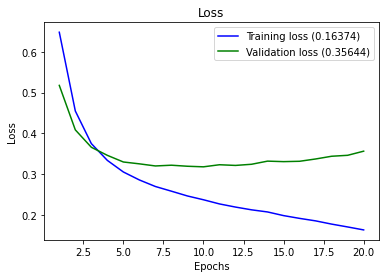

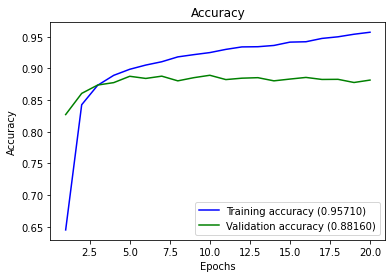

In [46]:
plot_history(history)

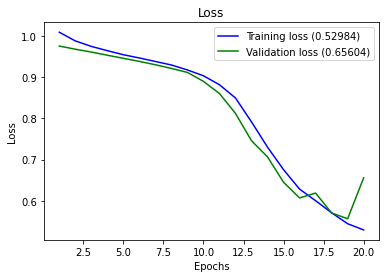

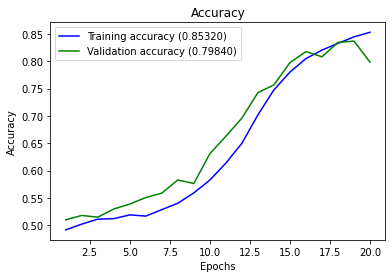

In [38]:
plot_history(history)

Po 20 epokach osiągamy dokładność walidacji ~86%, co jest całkiem dobrym wynikiem, biorąc pod uwagę, iż w każdej recenzji patrzymy tylko na pierwsze 200 słów. Należy jednak pamiętać, że samo spłaszczenie osadzonych sekwencji i wytrenowanie pojedynczej warstwy „Dense” na wierzchu prowadzi do modelu, który traktuje każde słowo w sekwencji wejściowej oddzielnie, tj. bez uwzględnienia relacji następstwa między poszczególnymi wyrazami zdania (np. _"ten film jest __kiepski__"_ jak również _"ten film prezentuje ostatnie przygody __Kiepskich__"_ będą sklasyfikowane jako negatywne "recenzje" z powodu użytego słowa __kiepski__, gdyż brak możliwości uwzględnienia kolejności słów, w jakim występuje to słowo, uniemożliwia określenie jego kontekstu. Znacznie lepiej byłoby dodać powtarzające się warstwy lub jednowymiarowe warstwy splotowe na osadzonych sekwencjach, aby poznać funkcje uwzględniające każdą sekwencję jako całość. Przyjrzymy się na temu wkrótce.

## Używanie wstępnie wytrenowanych osadzeń słów (pre-trained word embeddings)

Czasami mamy zbyt mało dostępnych danych treningowych, byśmy mogli ich użyć do nauczenia się odpowiedniego osadzania naszego słownictwa w zależności od zadania. W takich przypadkach, zamiast uczyć się osadzania słów wspólnie z trenowanym problemem, który chcemy rozwiązać, możemy załadować wcześniej wytrenowany wektory osadzania z przestrzeni osadzania, o której wiadomo, że jest wysoce ustrukturyzowana i wykazuje użyteczne właściwości, które wychwytują ogólne aspekty struktury języka. Przesłanki stojące za używaniem __wstępnie wytrenowanych osadzeń słów__ w przetwarzaniu języka naturalnego są bardzo podobne, jak w przypadku używania wstępnie wytrenowanych sieci convnet (z wykorzystaniem __uczenia transferowego__) w klasyfikacji obrazów. Jeśli nie mamy wystarczającej ilości dostępnych danych, aby samodzielnie nauczyć się naprawdę zaawansowanych funkcji, a funkcje, których potrzebujemy, mają być dosyć ogólne, tj. wspólne cechy wizualne lub cechy semantyczne, wtedy sensowne jest ponowne wykorzystanie funkcji wykształconych na podstawie innego, bogatszego zbioru danych niż nasz.

Takie __osadzenia słów__ są zazwyczaj obliczane przy użyciu __statystyk występowania słów__ (obserwacje, jakie słowa współwystępują w zdaniach lub dokumentach), przy użyciu różnych technik, z których niektóre obejmują sieci neuronowe. Pomysł gęstej, niskowymiarowej przestrzeni osadzania słów, obliczanej w sposób nienadzorowany, został początkowo zbadany przez Bengio i in. na początku 2000 roku, ale do dużego upowszczenienia osadzania doszło dopiero po opublikowaniu jednego z najbardziej znanych i odnoszących sukcesy schematów osadzania słów: __algorytmu Word2Vec__ (https://code.google.com/archive/p/) word2vec), opracowanego przez Mikolova z Google w 2013 roku. __Wymiary Word2Vec__ przechwytują określone właściwości semantyczne, np. płeć.

Istnieją różne wstępnie obliczone bazy danych osadzanych słów, które możemy pobrać i zacząć używać w warstwie Keras `Embedding`. Word2Vec jest jednym z nich. Innym popularnym jest Global Vectors for Word Representation, zwany __"GloVe"__ (https://nlp.stanford.edu/projects/glove), opracowany przez naukowców ze Stanford w 2014 roku. Jest to technika osadzania oparta na faktoryzacji macierzy statystyk współwystępowania słów. Jego twórcy udostępnili wstępnie obliczone osadzenie dla milionów tokenów języka angielskiego, uzyskanych z danych Wikipedii lub danych Common Crawl.

Spróbujmy wykorzystać osadzania GloVe w modelu Keras. Ta sama metoda będzie oczywiście obowiązywać w przypadku osadzania Word2Vec lub dowolnej innej bazy danych osadzania słów, którą można pobrać. Użyjemy tego przykładu również do odświeżenia technik tokenizacji tekstu, które przedstawiliśmy powyżej. Zacznijmy od surowego tekstu i przejdźmy dalej.

## Od surowego tekstu do osadzania słów

Będziemy używać modelu podobnego do tego, który właśnie omówiliśmy - osadzać zdania w sekwencjach wektorów, spłaszczać je i trenować warstwę `Dense` u góry modelu. Ale zrobimy to za pomocą wstępnie wytrenowanych osadzeń słów i zamiast używać wstępnie tokenizowanych danych IMDB spakowanych w Keras, a więc zaczniemy od zera, pobierając oryginalne dane tekstowe dla lepszego zrozumienia.

### Pobierz dane IMDB jako nieprzetworzony tekst

Najpierw przejdź do http://ai.stanford.edu/~amaas/data/sentiment/ lub https://ai.stanford.edu/~amaas/data/sentiment/ i pobierz oryginalny zestaw danych IMDB („IMDB dataset” , zbiór danych recenzji dużego filmu). Rozpakuj go.

Teraz zbierzmy poszczególne recenzje uczące w postaci listy tekstów, po jednym tekście na recenzję, a także zbierzmy etykiety recenzji (pozytywne / negatywne) na liście `labels`:

In [48]:
import os

imdb_dir = 'E:/OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie/Programming/Data/nlp/aclImdb_v1/aclImdb' # 'C:/ml/data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding ="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### Tokenizuj dane

Zwektoryzujmy zebrane teksty i przygotujmy ich podział na zbiór uczący i walidacyjny.

Ponieważ wstępnie wytrenowane osadzania słów mają być szczególnie przydatne w przypadku problemów, w przypadku których dostępnych jest niewiele danych treningowych (w przeciwnym razie osadzania specyficzne dla zadania prawdopodobnie będą lepsze od nich), dodamy następującą zmianę: ograniczamy dane szkoleniowe do pierwszych 2000 przykładów uczących. Będziemy więc uczyć się klasyfikować recenzje filmów po obejrzeniu zaledwie 2000 przykładów!

In [49]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 200  # We will cut reviews after 100 words
training_samples = 2000  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10,000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set, but first, shuffle the data,
# since we started from data where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 200)
Shape of label tensor: (25000,)


## Pobierz osadzenia słów GloVe

Przejdź do https://nlp.stanford.edu/projects/glove/ (gdzie możesz dowiedzieć się więcej o algorytmie GloVe, znaleźć różne wstępnie wytrenowane wektory słów) i pobrać wstępnie obliczone elementy do osadzania z angielskiej Wikipedii z 2014 r., o nazwie ` glove.6B.zip`, zawierający 50, 100, 200 i 300-wymiarowych wektorów osadzania dla 400 000 słów (lub tokenów innych niż słowa). Rozpakuj go i ustaw właściwy katalog na poniższy kod. Użyjemy 200-wymiarowych wektorów osadzania, ale możesz spróbować użyć innego.

### Przetwórz wstępnie osadzenia

Przeanalizujmy rozpakowany plik (jest to plik `txt`), aby zbudować indeks odwzorowujący słowa (jako łańcuchy znaków) na ich reprezentację wektorową (jako wektory liczbowe).

In [50]:
glove_dir = 'E:/OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie/Programming/Data/nlp/glove.6B'  # 'C:/ml/data/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding ="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Teraz zbudujmy macierz osadzania, którą będziemy mogli załadować do warstwy `Embedding`. Musi to być macierz o kształcie `(max_words, embedding_dim)`, gdzie każdy wpis `i` zawiera wektor `embedding_dim`-wymiarowy dla słowa o indeksie `i` w naszym indeksie słów referencyjnych (zbudowanym podczas tokenizacji). Zauważ, że indeks `0` nie ma oznaczać żadnego słowa ani symbolu - jest to symbol zastępczy.

In [51]:
embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### Zdefiniuj model

Będziemy używać tej samej architektury modelu co poprzednio:

In [52]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.3)) #+
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 200, 200)          2000000   
                                                                 
 flatten_24 (Flatten)        (None, 40000)             0         
                                                                 
 dropout_41 (Dropout)        (None, 40000)             0         
                                                                 
 dense_67 (Dense)            (None, 16)                640016    
                                                                 
 dense_68 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,640,033
Trainable params: 2,640,033
Non-trainable params: 0
_________________________________________________________________


### Załaduj osadzenia GloVe w modelu

Warstwa `Embedding` ma pojedynczą 2D macierz wag o wartościach zmiennoprzecinkowych, w której każdy wpis `i` jest wektorem słów, który ma być powiązany z indeksem `i`. Po prostu załadujmy przygotowaną przez nas macierz GloVe do naszej warstwy `Embedding`, pierwszej warstwy w naszym modelu:

### Trenuj i oceniaj

Skompilujmy nasz model i wytrenujmy go:

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights(glove_dir + '/' + 'pre_trained_glove_model.h5')

Epoch 1/40
63/63 [==============================] - 3s 31ms/step - loss: 0.7295 - acc: 0.5235 - val_loss: 0.7253 - val_acc: 0.5632
Epoch 2/40
63/63 [==============================] - 2s 31ms/step - loss: 0.4957 - acc: 0.8470 - val_loss: 0.6939 - val_acc: 0.6441
Epoch 3/40
63/63 [==============================] - 2s 36ms/step - loss: 0.2104 - acc: 0.9820 - val_loss: 0.6216 - val_acc: 0.7294
Epoch 4/40
63/63 [==============================] - 4s 68ms/step - loss: 0.1243 - acc: 0.9945 - val_loss: 0.6661 - val_acc: 0.6971
Epoch 5/40
63/63 [==============================] - 3s 54ms/step - loss: 0.0872 - acc: 0.9990 - val_loss: 0.5466 - val_acc: 0.7643
Epoch 6/40
63/63 [==============================] - 2s 34ms/step - loss: 0.0644 - acc: 1.0000 - val_loss: 0.5255 - val_acc: 0.7680
Epoch 7/40
63/63 [==============================] - 3s 45ms/step - loss: 0.0514 - acc: 1.0000 - val_loss: 0.5762 - val_acc: 0.7396
Epoch 8/40
63/63 [==============================] - 2s 38ms/step - loss: 0.0426 - a

In [54]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Dodatkowo zamrażamy warstwę osadzania (ustawiając jej atrybut `trainable` na `False`), ponieważ warstwy `Embedding` modelu są wstępnie wytrenowane, a pozostałe części są losowo inicjowane (nasz klasyfikator). Wstępnie wyszkolonych części nie należy aktualizować podczas treningu (podobnie jak w przypadku uczenia transferowego), aby nie zapsuć tego, czego się już wcześniej nauczyły. Aktualizacja dużego gradientu wywołana przez losowo inicjowane warstwy bardzo zniekształciłyby poznane już funkcje w warstwach `Embedding`.

Narysujmy jego wydajność w czasie:

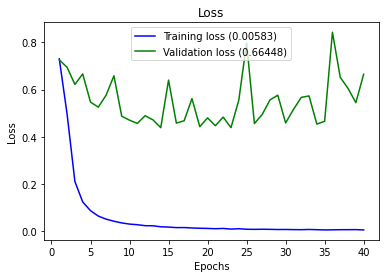

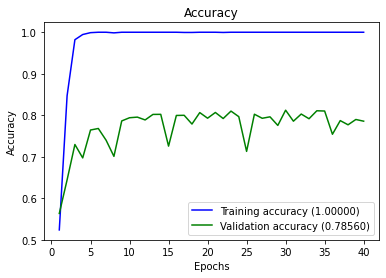

In [55]:
plot_history(history)

Model szybko zaczyna się nadmiernie dopasowywać, co nie jest zaskakujące, biorąc pod uwagę niewielką liczbę próbek treningowych. Dokładność walidacji ma dużą wariancję z tego samego powodu, ale wydaje się, że sięga 80%.

Pamiętaj, że przebieg Twojego procesu uczenia może się różnić od pokazanego powyżej: ponieważ mamy tak mało próbek treningowych, wydajność w dużej mierze zależy od tego, które z pośród 2000 przetasowanych próbek wybraliśmy, a wybraliśmy je losowo. Jeśli zadziałało to naprawdę słabo, spróbuj wybrać inny losowy zestaw 2000 próbek, tylko ze względu na to ćwiczenie (w prawdziwym życiu nie możesz wybrać danych treningowych).

Możemy również spróbować wytrenować ten sam model bez ładowania wstępnie wytrenowanych osadzeń słów i bez zamrażania warstwy osadzania. W takim przypadku nauczylibyśmy się osadzania naszych tokenów wejściowych dla konkretnego zadania, które jest generalnie potężniejsze niż osadzanie wstępnie wytrenowanych słów, gdy dostępnych jest wiele danych. Jednak w naszym przypadku mamy tylko 2000 próbek treningowych. Spróbujmy:

In [56]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 200, 200)          2000000   
                                                                 
 flatten_25 (Flatten)        (None, 40000)             0         
                                                                 
 dropout_42 (Dropout)        (None, 40000)             0         
                                                                 
 dense_69 (Dense)            (None, 16)                640016    
                                                                 
 dense_70 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,640,033
Trainable params: 2,640,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
63/63 [=========================

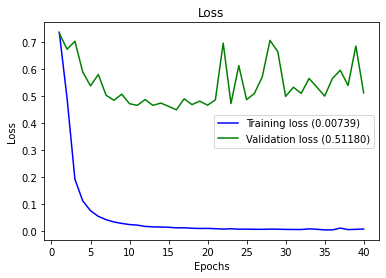

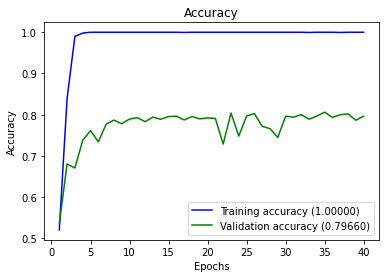

In [57]:
plot_history(history)

Dokładność walidacji nadal nie przekraczała 80%. Tak więc w naszym przypadku wstępnie wytrenowane osadzania słów przewyższają wspólnie nauczone osadzania z trenowanym klasyfikatorem. Jeśli zwiększysz liczbę próbek treningowych do kilku tysięcy, to szybko przestanie tak być – zrób to jako ćwiczenie.

Na koniec oceńmy model na danych testowych. Najpierw będziemy musieli tokenizować dane testowe:

In [58]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding ="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Załadujmy i oceńmy pierwszy model:

In [60]:
model.load_weights(glove_dir + '/' + 'pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6726 - acc: 0.7834


[0.6725558042526245, 0.7833999991416931]

Otrzymujemy nadal niesatysfakcjonującą dokładność testu na poziomie ok. 80%, co jest dalekie od naszych oczekiwań. Praca z zaledwie kilkoma próbkami treningowymi jest, jak widać, trudna!

Po tym wprowadzeniu będziemy używać znacznie lepiej przystosowanych do danych sekwencyjnych modeli rekurencyjnych, aby osiągnąć lepsze wyniki w przyszłości, gdyż jak się przekonaliśmy, modele gęste nie zapewniają możliwości osiągnięcia wysokiej skuteczności dla danych sekwencyjnych.

## Zadania:

* Przygotuj własny notebook, zatytułuj go "Dane Sekwencyjne - Embedding" i podaj swoje imię i nazwisko oraz nazwę przedmiotu (GSN) w nagłówku.
* Użyj więcej próbek treningowych niż 2000, np. 5000, 10000 lub 15000 i porównaj, jak to wpływa na wyniki i wydajność systemu?
* Użyj inną liczbę słów każdej recenzji niż 200 słów i porównaj wyniki z tym, co osiągnęliśmy tutaj.
* Spróbuj zmodyfikować hiperparametry modeli (liczbę neuronów w ukrytej warstwie gęstej (32), więcej warstw gęstych, funkcję aktywacji (relu na leaky-relu lub elu), hiperparametry regularyzacji itp. Porównaj wyniki i wyprowadź wnioski.
* Wykorzystaj automatyczne przeszukiwanie wybranych hiperparametrów, korzystając np. z from sklearn.model_selection import GridSearchCV.
* Spróbuj wykorzystać inny wymiar przestrzeni osadzania: 50, 100 lub 300 oraz zbadaj wpływ na uzyskiwane wyniki. Wyprowadź wnioski.
* Spróbuj skorzystać z innych dostępnych zbiorów osadzań słów (Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip, Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip lub Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip) na stronie https://nlp.stanford.edu/projects/glove/ i porównaj uzyskane wyniki. Wyprowadź wnioski.